In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
np.random.seed(7)

Using TensorFlow backend.


[(-5, 5), Text(0,0.5,'$X_2$'), (-5, 5), Text(0.5,0,'$X_1$'), None]

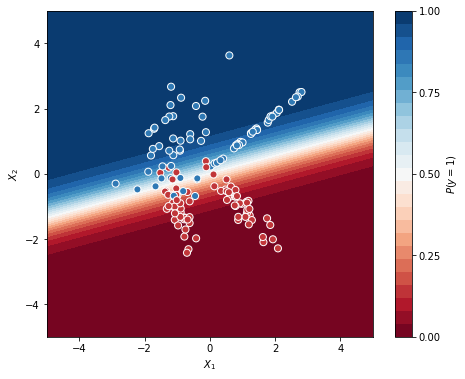

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=10)


clf = LogisticRegression().fit(train_x, train_y)
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(train_x[:, 0], train_x[:, 1], c=train_y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

In [3]:
clf.score(test_x, test_y)

0.92

In [4]:
model2 = Sequential()
model2.add(Dense(12, input_dim=2, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
# Compile model
adam_optimizer = adam(lr=0.001)
model2.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])
# Fit the model
model2.fit(train_x, train_y, epochs=50, batch_size=10)
# evaluate the model
scores = model2.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

Epoch 1/50
150/150 [==============================] - 0s 1ms/step - loss: 0.6879 - acc: 0.5933
Epoch 2/50
150/150 [==============================] - 0s 360us/step - loss: 0.6805 - acc: 0.8333
Epoch 3/50
150/150 [==============================] - 0s 362us/step - loss: 0.6706 - acc: 0.8667
Epoch 4/50
150/150 [==============================] - 0s 368us/step - loss: 0.6541 - acc: 0.8733
Epoch 5/50
150/150 [==============================] - 0s 540us/step - loss: 0.6317 - acc: 0.9000
Epoch 6/50
150/150 [==============================] - 0s 359us/step - loss: 0.5962 - acc: 0.9000
Epoch 7/50
150/150 [==============================] - 0s 457us/step - loss: 0.5518 - acc: 0.9000
Epoch 8/50
150/150 [==============================] - 0s 456us/step - loss: 0.4985 - acc: 0.9000
Epoch 9/50
150/150 [==============================] - 0s 350us/step - loss: 0.4495 - acc: 0.9000
Epoch 10/50
150/150 [==============================] - 0s 465us/step - loss: 0.4076 - acc: 0.9133
Epoch 11/50
150/150 [==========

In [5]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                36        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total para

In [8]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs2 = model2.predict(grid)

[(-5, 5), Text(0,0.5,'$X_2$'), (-5, 5), Text(0.5,0,'$X_1$'), None]

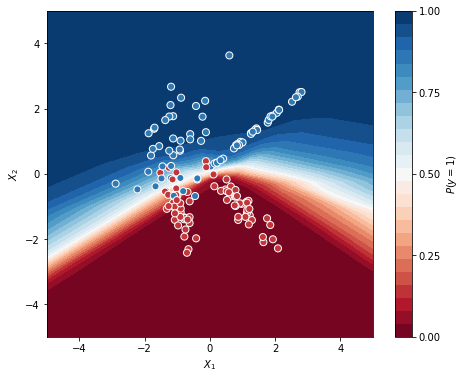

In [9]:
probs_model2 = probs2.reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs_model2, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(train_x[:,0], train_x[:, 1], c=train_y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

Epoch 1/50
150/150 [==============================] - 0s 2ms/step - loss: 0.6902 - acc: 0.5133
Epoch 2/50
150/150 [==============================] - 0s 357us/step - loss: 0.6836 - acc: 0.5133
Epoch 3/50
150/150 [==============================] - 0s 325us/step - loss: 0.6767 - acc: 0.5133
Epoch 4/50
150/150 [==============================] - 0s 323us/step - loss: 0.6660 - acc: 0.5133
Epoch 5/50
150/150 [==============================] - 0s 301us/step - loss: 0.6477 - acc: 0.5133
Epoch 6/50
150/150 [==============================] - 0s 327us/step - loss: 0.6210 - acc: 0.5867
Epoch 7/50
150/150 [==============================] - 0s 369us/step - loss: 0.5868 - acc: 0.6867
Epoch 8/50
150/150 [==============================] - 0s 462us/step - loss: 0.5489 - acc: 0.7200
Epoch 9/50
150/150 [==============================] - 0s 517us/step - loss: 0.5124 - acc: 0.8333
Epoch 10/50
150/150 [==============================] - 0s 434us/step - loss: 0.4784 - acc: 0.8933
Epoch 11/50
150/150 [==========

[(-5, 5), Text(0,0.5,'$X_2$'), (-5, 5), Text(0.5,0,'$X_1$'), None]

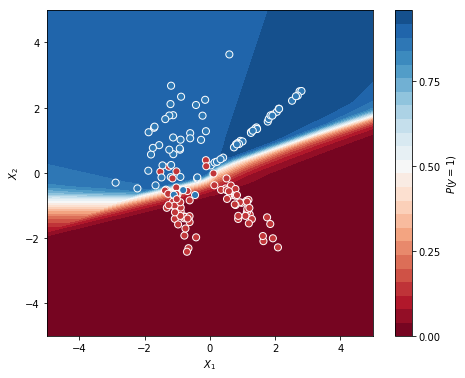

In [12]:
np.random.seed(7)
model3 = Sequential()
model3.add(Dense(12, input_dim=2, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
# Compile model
adam_optimizer = adam(lr=0.001)
model3.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])
# Fit the model
model3.fit(train_x, train_y, epochs=50, batch_size=10)
# evaluate the model
scores = model3.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))
probs3 = model3.predict(grid)
probs_model3 = probs3.reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs_model3, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(train_x[:,0], train_x[:, 1], c=train_y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

Epoch 1/50
150/150 [==============================] - 0s 3ms/step - loss: 0.6757 - acc: 0.5000
Epoch 2/50
150/150 [==============================] - 0s 428us/step - loss: 0.6577 - acc: 0.7867
Epoch 3/50
150/150 [==============================] - 0s 454us/step - loss: 0.6192 - acc: 0.8800
Epoch 4/50
150/150 [==============================] - 0s 480us/step - loss: 0.5702 - acc: 0.8867
Epoch 5/50
150/150 [==============================] - 0s 427us/step - loss: 0.5179 - acc: 0.8800
Epoch 6/50
150/150 [==============================] - 0s 505us/step - loss: 0.4735 - acc: 0.8867
Epoch 7/50
150/150 [==============================] - 0s 603us/step - loss: 0.4363 - acc: 0.8800
Epoch 8/50
150/150 [==============================] - 0s 448us/step - loss: 0.4007 - acc: 0.8800
Epoch 9/50
150/150 [==============================] - 0s 582us/step - loss: 0.3635 - acc: 0.8867
Epoch 10/50
150/150 [==============================] - 0s 374us/step - loss: 0.3234 - acc: 0.9133
Epoch 11/50
150/150 [==========

[(-5, 5), Text(0,0.5,'$X_2$'), (-5, 5), Text(0.5,0,'$X_1$'), None]

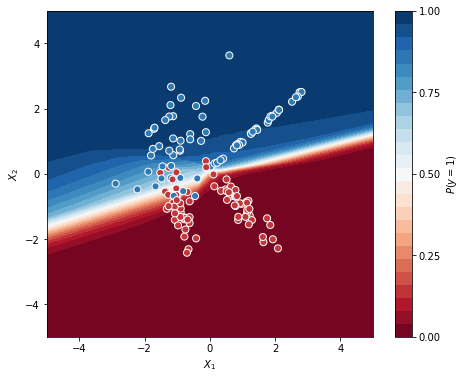

In [14]:
np.random.seed(1)
model3 = Sequential()
model3.add(Dense(12, input_dim=2, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
# Compile model
adam_optimizer = adam(lr=0.001)
model3.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])
# Fit the model
model3.fit(train_x, train_y, epochs=50, batch_size=10)
# evaluate the model
scores = model3.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))
probs3 = model3.predict(grid)
probs_model3 = probs3.reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs_model3, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(train_x[:,0], train_x[:, 1], c=train_y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")